# 财务报表数据可视化案例

In [150]:
import pandas as pd 
import numpy as py 
import datetime 
import matplotlib.pyplot as plt 
import sklearn as sk 
import scipy as sp 
import baostock as bs 
import seaborn as sns 

In [151]:
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']  # Mac常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
pd.options.display.float_format = '{:.2f}'.format

In [168]:
#以为京东方A为例
tables=pd.read_html("https://s.askci.com/stock/financialanalysis/003030/",header=0)
df=tables[1]
df=df[df['类别\年份']>2020]
df

,类别\年份,销售毛利率 （%),营业利润率 （%),总资产利润率 （%),净资产收益率,存货周转率,应收账款周转率 （次),总资产周转率 （次)
8,2021,5.01,5.22,4.12,5.56%,13.83,10.51,0.79
9,2022,2.96,3.24,2.75,3.75%,14.31,11.01,0.85
10,2023,3.18,3.41,2.49,3.87%,13.64,10.90,0.73


In [153]:
df.columns

Index(['类别\年份', '销售毛利率 （%)', '营业利润率 （%)', '总资产利润率 （%)', '净资产收益率', '存货周转率',
       '应收账款周转率 （次)', '总资产周转率 （次)'],
      dtype='object')

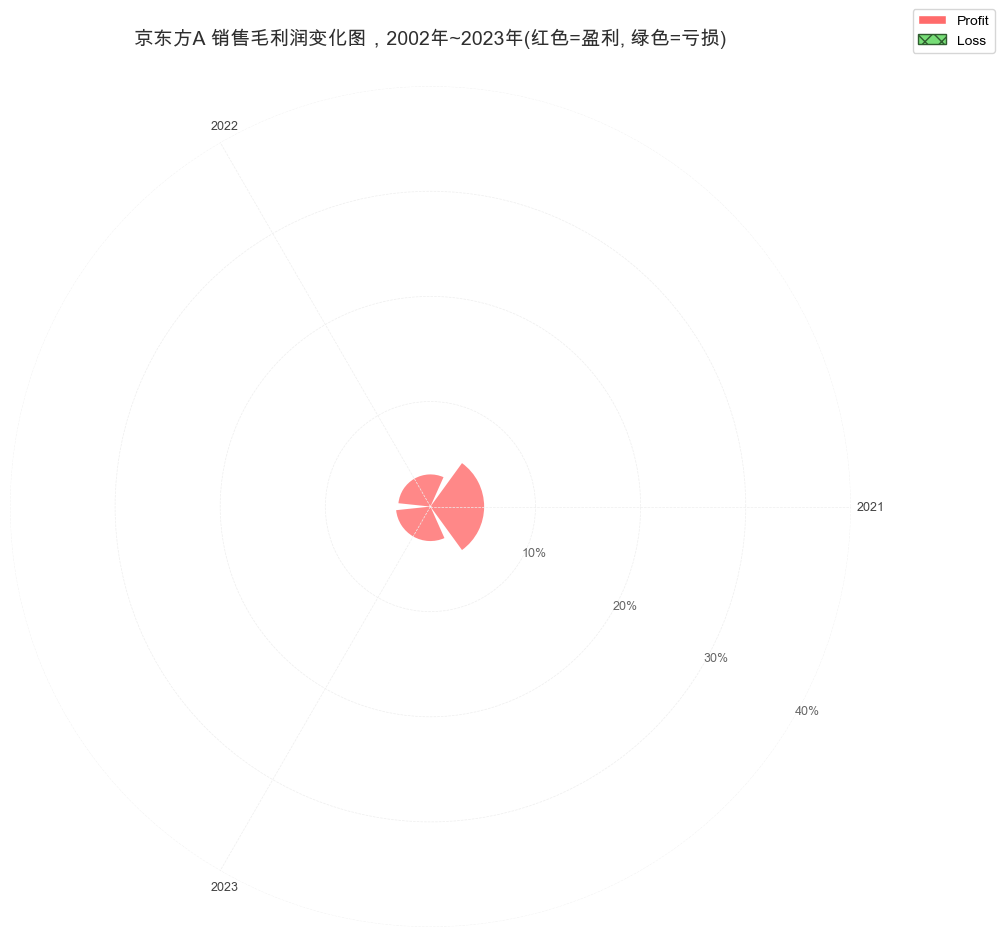

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# 提取数据
years = df['类别\年份']
gross_margin = df['销售毛利率 （%)']

# 创建极坐标系
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

# 设置红绿颜色方案（盈利红/亏损绿）
colors = ['#FF6B6B' if value >=0 else '#77DD77' for value in gross_margin]

# 计算角度参数
theta = np.linspace(0, 2*np.pi, len(years), endpoint=False)
width = 2*np.pi / len(years) * 0.9

# 转换绝对值为半径
radii = np.abs(gross_margin)
bars = ax.bar(theta, radii, width=width, bottom=0.1, linewidth=0,
             color=colors, alpha=0.8, edgecolor='white')

# 增强负值显示
for bar, value in zip(bars, gross_margin):
    if value < 0:
        bar.set_alpha(0.9)
        bar.set_hatch('xx')  # 添加交叉线纹理
        bar.set_edgecolor('#2F5D2F')  # 深绿色边框

# 标签设置
ax.set_xticks(theta)
ax.set_xticklabels(years, fontsize=9, color='#444444')
ax.set_rlabel_position(330)
ax.set_yticks([10, 20, 30, 40])
ax.set_yticklabels(['10%','20%','30%','40%'], color='#666666', fontsize=9)

# 智能标签旋转
label_angles = np.degrees(theta)
for label, angle in zip(ax.get_xticklabels(), label_angles):
    label.set_rotation(angle-90)
    label.set_horizontalalignment('center' if -90 < angle < 90 else 'left')

# 添加标题和装饰
plt.title("京东方A 销售毛利润变化图，2002年~2023年(红色=盈利, 绿色=亏损)", 
         fontsize=14, pad=30, color='#2F2F2F', weight='bold')
ax.grid(color='#EEEEEE', linestyle='--', linewidth=0.5)
ax.spines[:].set_visible(False)

# 创建自定义图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF6B6B', edgecolor='white', label='Profit'),
    Patch(facecolor='#77DD77', edgecolor='#2F5D2F', hatch='xx', label='Loss')
]
ax.legend(handles=legend_elements, loc='upper right', 
         bbox_to_anchor=(1.18, 1.1), fontsize=10)

plt.tight_layout()
plt.show()


In [19]:
from pyecharts.charts import Pie 
from pyecharts import options as opts 
from pyecharts.globals import CurrentConfig
CurrentConfig.NOTEBOOK_SHOW = True

In [156]:
x=df['类别\年份'].tolist()
y1=df['销售毛利率 （%)'].tolist()
data=[z for z in zip(x,y1)]

### 用玫瑰图可视化数据

In [157]:
from pyecharts.globals import CurrentConfig
CurrentConfig.NOTEBOOK_SHOW = True

In [158]:
# 如果显示空白，可能需要加载在线资源
CurrentConfig.ONLINE_HOST = "https://cdn.jsdelivr.net/npm/echarts@5.4.2/dist/"

In [159]:
# 处理数据：生成带颜色和绝对值的PieItem列表
rosedata = []
for year, value in data:
    label = f"{year}\n{value:.2f}%"  # 标签格式为年份+原始值
    abs_value = abs(value)
    # 根据数值正负分配颜色（红色正数，蓝色负数）
    color = "#FF4500" if value >= 0 else "#1E90FF"
    rosedata.append(
        opts.PieItem(
            name=label,
            value=abs_value,
            itemstyle_opts=opts.ItemStyleOpts(color=color)
        )
    )

# 创建玫瑰图
rose_chart = (
    Pie()
    .add(
        "",
        data_pair=rosedata,
        rosetype="radius",  # 半径模式（数值决定扇区大小）
        radius=["10%", "75%"],  # 内半径10%，外半径75%
        center=["50%", "50%"],  # 图中心位置
        start_angle=90,  # 起始角度90度（12点方向）
        label_opts=opts.LabelOpts(
            is_show=True,
            position="inside",
            font_size=12,
            formatter="{b}",  # 显示标签中的name（年份+原始值）
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="2002年以来销售毛利率变化玫瑰图（红色正增长，蓝色负增长）",
            pos_left="center",
            title_textstyle_opts=opts.TextStyleOpts(font_size=18)
        ),
        legend_opts=opts.LegendOpts(is_show=False)  # 隐藏图例
    )
)

# 生成HTML文件
rose_chart.render("rose_chart.html")

'/Users/wulixin/Documents/GitHub/2025Python-/rose_chart.html'

### 采用双图进行布局

In [51]:
from pyecharts.charts import Pie 
from pyecharts import options as opts 
from pyecharts.globals import CurrentConfig
CurrentConfig.NOTEBOOK_SHOW = True

In [52]:
rosedata = []
positive_data = []
negative_data = []

for year, value in data:
    label = f"{year}\n{value:.2f}%"
    abs_value = abs(value)
    color = "#FF4500" if value >= 0 else "#1E90FF"
    
    # 直接分离到正/负数据集
    if value >= 0:
        positive_data.append(
            opts.PieItem(
                name=label,
                value=abs_value,
                itemstyle_opts=opts.ItemStyleOpts(color=color)
            )
        )
    else:
        negative_data.append(
            opts.PieItem(
                name=label,
                value=abs_value,
                itemstyle_opts=opts.ItemStyleOpts(color=color)
            )
        )

# 合并数据（若需要）
rosedata = positive_data + negative_data

In [ ]:
from pyecharts.charts import Pie
from pyecharts import options as opts

# 生成正增长玫瑰图
rose_positive = (
    Pie()
    .add(
        series_name="正增长",
        data_pair=positive_data,
        rosetype="radius",
        radius=["10%", "75%"],
        center=["35%", "55%"],
        label_opts=opts.LabelOpts(formatter="{b}", position="inside")
    )
)

# 生成负增长玫瑰图
rose_negative = (
    Pie()
    .add(
        series_name="负增长",
        data_pair=negative_data,
        rosetype="radius",
        radius=["10%", "75%"],
        center=["65%", "55%"],
        label_opts=opts.LabelOpts(formatter="{b}", position="inside")
    )
)

# 组合渲染
#rose_positive.overlap(rose_negative).render("rose_chart.html")
#方法通常用于组合不同类型的图表（如折线图+柱状图）
from pyecharts.charts import Page, Pie

# 创建页面容器
page = Page()

# 添加正/负增长玫瑰图
page.add(rose_positive, rose_negative)

# 渲染为独立 HTML
page.rend(rose_new.html)


In [64]:
rose_positive = (
    Pie()
    .add(series_name="正增长",
        data_pair=positive_data,
        rosetype="radius",
        label_opts=opts.LabelOpts(formatter="{b}", position="inside"), center=["35%", "55%"], radius=["10%", "75%"])
)

rose_negative = (
    Pie()
    .add(series_name="负增长",
        data_pair=negative_data,
        rosetype="radius",
        label_opts=opts.LabelOpts(formatter="{b}", position="inside"), center=["75%", "60%"], radius=["10%", "75%"])
)

# 使用 Grid 组合
from pyecharts.charts import Grid
import datetime
grid=Grid()
grid.add(rose_positive, grid_opts=opts.GridOpts(pos_left="10%"))
grid.add(rose_negative, grid_opts=opts.GridOpts(pos_right="10%"))
grid.render("grid_rose.html")


'/Users/wulixin/Documents/GitHub/2025Python-/grid_rose.html'

### 根据毛利率，营业净利率，权益净利率，总资产净利率绘制面积图

In [160]:
from pyecharts.charts import Line 
from pyecharts import options as opts 
from pyecharts.globals import ThemeType 

In [161]:
x=df['类别\年份'].tolist()
y1=df['销售毛利率 （%)'].tolist()
y2=df['营业利润率 （%)'].tolist()
y3=df['净资产收益率'].tolist()
y4=df['总资产利润率 （%)'].tolist()

y5=df['存货周转率'].tolist()
y6=df['应收账款周转率 （次)'].tolist()
y7=df['总资产周转率 （次)'].tolist()

Line1 = Line(init_opts=opts.InitOpts(width='900px',height='500px',theme=ThemeType.ESSOS))
Line1.add_xaxis(x)
Line1.add_yaxis('销售毛利率 （%)',y1,is_smooth=True)
Line1.add_yaxis('营业利润率 （%)',y2,is_smooth=True)#Line1.add_yaxis('净资产收益率',y3,is_smooth=True)
Line1.add_yaxis('总资产利润率 （%)',y4,is_smooth=True)
Line1.set_global_opts(title_opts = opts.TitleOpts(title='2002年以来盈利能力指标统计',pos_left='center'),
                     legend_opts=opts.LegendOpts(pos_left='12%',pos_top='15%',orient='vertical'),
                     xaxis_opts = opts.AxisOpts(name="年份"),
                     yaxis_opts=opts.AxisOpts(name='比率'),
                     toolbox_opts=opts.ToolboxOpts(is_show=True))

Line1.set_series_opts(linestyle_opts=opts.LineStyleOpts(width=4),
                     label_opts=opts.LabelOpts(is_show=False),areastyle_opts=opts.AreaStyleOpts(opacity=0.3))

Line1.render('Profit_2002.html')

'/Users/wulixin/Documents/GitHub/2025Python-/Profit_2002.html'

### 整体发现pechart 与python的兼容性比较差,bokeh参数不好弄

In [162]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Range1d
from bokeh.layouts import gridplot
from bokeh.palettes import Category10
from bokeh.palettes import tol
from bokeh.plotting import figure, show

In [167]:
df

,年份,销售毛利率,营业利润率,净资产收益率
0,2002,2.89,4.52,4.00
1,2003,3.47,4.10,15.28
2,2004,0.02,2.42,4.72
3,2005,-12.24,-10.80,-38.30
4,2006,-37.15,-20.07,-57.75
5,2007,6.46,7.53,16.33
6,2008,-10.25,-11.15,-15.94
7,2009,-19.04,-1.31,0.39
8,2010,-29.72,-27.93,-11.77
9,2011,-34.38,6.64,2.22


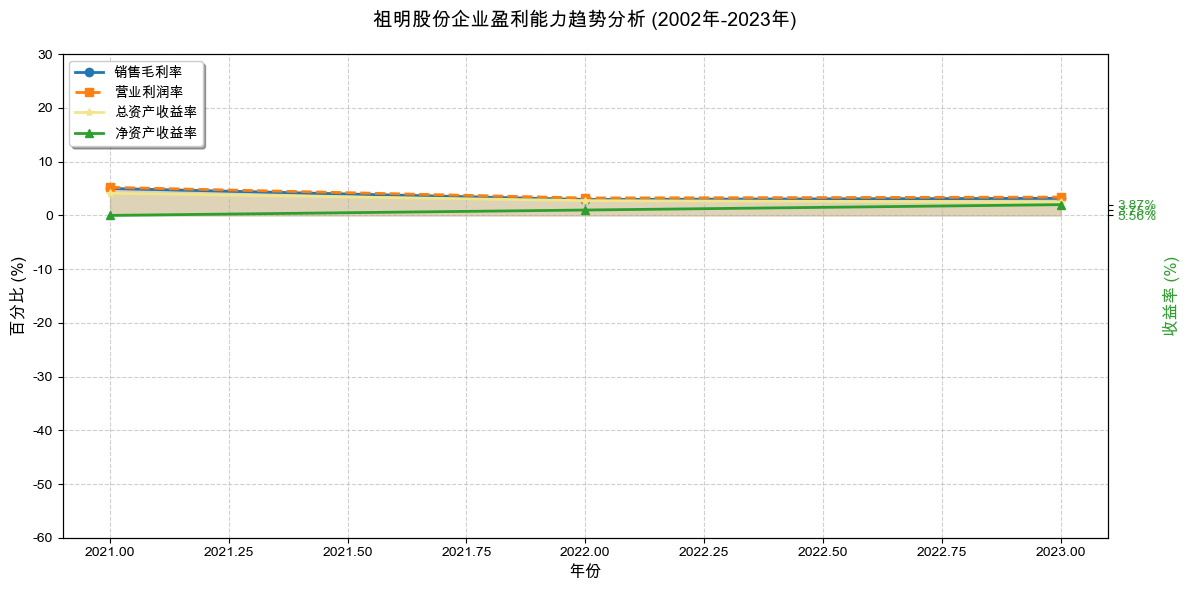

In [170]:
df = pd.DataFrame(df)

# 创建画布和主坐标轴
fig, ax1 = plt.subplots(figsize=(12, 6))

# 设置颜色方案
colors = {
    '销售毛利率': '#1f77b4',  # 蓝色
    '营业利润率': '#ff7f0e',  # 橙色
    '净资产收益率': '#2ca02c',  # 绿色
    '总资产收益率':'#F0E68C'
}

# 绘制主Y轴数据（毛利率和营业利润率）
ax1.set_xlabel('年份', fontsize=12)
ax1.set_ylabel('百分比 (%)', fontsize=12)

# 销售毛利率（带填充）
ax1.plot(df['类别\年份'], df['销售毛利率 （%)'], color=colors['销售毛利率'], linewidth=2,marker='o',label='销售毛利率')
ax1.fill_between(df['类别\年份'], df['销售毛利率 （%)'], 0,color=colors['销售毛利率'], alpha=0.2)


# 营业利润率（带填充）
ax1.plot(df['类别\年份'], df['营业利润率 （%)'],color=colors['营业利润率'],linewidth=2, linestyle='--',marker='s',label='营业利润率')
ax1.fill_between(df['类别\年份'], df['营业利润率 （%)'], 0, color=colors['营业利润率'],alpha=0.2)

# 总资产利润率（带填充）
ax1.plot(df['类别\年份'], df['总资产利润率 （%)'],color=colors['总资产收益率'],linewidth=2, linestyle='-',marker='*',label='总资产收益率')
ax1.fill_between(df['类别\年份'], df['总资产利润率 （%)'], 0, color=colors['总资产收益率'],alpha=0.2)



# 设置主Y轴范围
ax1.set_ylim(-60, 30)  # 根据数据最小/最大值调整

# 创建次Y轴（净资产收益率）
ax2 = ax1.twinx()
ax2.plot(df['类别\年份'], df['净资产收益率'],color=colors['净资产收益率'],linewidth=2,marker='^',label='净资产收益率')
ax2.set_ylabel('收益率 (%)', color=colors['净资产收益率'], fontsize=12)
ax2.tick_params(axis='y', labelcolor=colors['净资产收益率'])
ax2.set_ylim(-60, 30)  # 与主Y轴对齐


# 添加网格线和标题
ax1.grid(True, linestyle='--', alpha=0.6)
plt.title('祖明股份企业盈利能力趋势分析 (2002年-2023年)', fontsize=14, pad=20)

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
         loc='upper left',
         frameon=True,
         shadow=True)

# 优化X轴刻度显示
#plt.xticks(np.arange(2002, 2024, 2), rotation=45)
plt.xticks(rotation=45)
plt.tight_layout()

# 显示图表
plt.show()


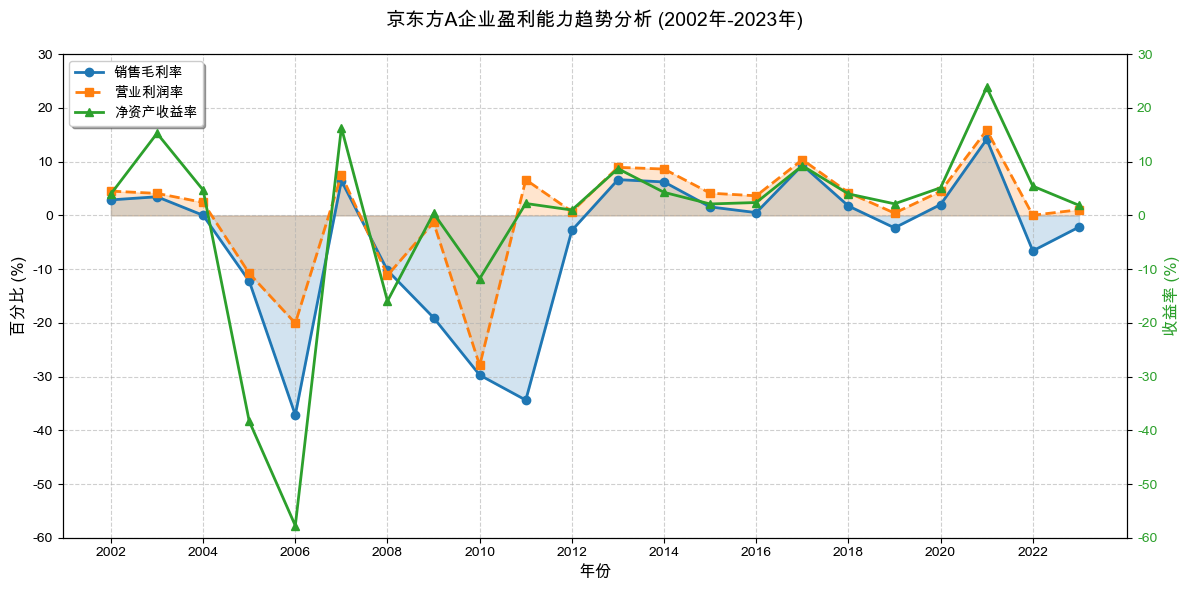

In [165]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 数据准备
data = {
    '年份': [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 
           2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    '销售毛利率': [2.89, 3.47, 0.02, -12.24, -37.15, 6.46, -10.25, -19.04, -29.72, -34.38,
               -2.79, 6.66, 6.23, 1.58, 0.52, 9.37, 1.75, -2.32, 2.03, 14.17, -6.60, -2.18],
    '营业利润率': [4.52, 4.10, 2.42, -10.80, -20.07, 7.53, -11.15, -1.31, -27.93, 6.64,
              0.72, 8.95, 8.63, 4.14, 3.65, 10.38, 4.24, 0.43, 4.49, 15.87, 0.03, 1.05],
    '净资产收益率': [4.00, 15.28, 4.72, -38.30, -57.75, 16.33, -15.94, 0.39, -11.77, 2.22,
               1.00, 8.70, 4.29, 2.13, 2.40, 9.25, 4.00, 2.16, 5.15, 23.84, 5.45, 1.89]
}
df = pd.DataFrame(data)

# 创建画布和主坐标轴
fig, ax1 = plt.subplots(figsize=(12, 6))

# 设置颜色方案
colors = {
    '销售毛利率': '#1f77b4',  # 蓝色
    '营业利润率': '#ff7f0e',  # 橙色
    '净资产收益率': '#2ca02c'  # 绿色
    
}

# 绘制主Y轴数据（毛利率和营业利润率）
ax1.set_xlabel('年份', fontsize=12)
ax1.set_ylabel('百分比 (%)', fontsize=12)

# 销售毛利率（带填充）
ax1.plot(df['年份'], df['销售毛利率'], 
        color=colors['销售毛利率'], 
        linewidth=2,
        marker='o',
        label='销售毛利率')
ax1.fill_between(df['年份'], df['销售毛利率'], 0,
                color=colors['销售毛利率'], 
                alpha=0.2)

# 营业利润率（带填充）
ax1.plot(df['年份'], df['营业利润率'],
        color=colors['营业利润率'],
        linewidth=2,
        linestyle='--',
        marker='s',
        label='营业利润率')
ax1.fill_between(df['年份'], df['营业利润率'], 0,
                color=colors['营业利润率'],
                alpha=0.2)


# 设置主Y轴范围
ax1.set_ylim(-60, 30)  # 根据数据最小/最大值调整

# 创建次Y轴（净资产收益率）
ax2 = ax1.twinx()
ax2.plot(df['年份'], df['净资产收益率'],
        color=colors['净资产收益率'],
        linewidth=2,
        marker='^',
        label='净资产收益率')
ax2.set_ylabel('收益率 (%)', color=colors['净资产收益率'], fontsize=12)
ax2.tick_params(axis='y', labelcolor=colors['净资产收益率'])
ax2.set_ylim(-60, 30)  # 与主Y轴对齐

# 添加网格线和标题
ax1.grid(True, linestyle='--', alpha=0.6)
plt.title('京东方A企业盈利能力趋势分析 (2002年-2023年)', fontsize=14, pad=20)

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
         loc='upper left',
         frameon=True,
         shadow=True)

# 优化X轴刻度显示
plt.xticks(np.arange(2002, 2024, 2), rotation=45)
plt.tight_layout()

# 显示图表
plt.show()


下一部分放在第二篇章

### 下一部分放在第二篇章